<a href="https://colab.research.google.com/github/Gopichandkollu/Python-ML-Assignments/blob/main/Day_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv(r"/content/Day_15_Healthcare_Data.csv")
df.head()

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diabetes,Heart_Disease
0,1,69,Male,95.0,122.0,No,No
1,2,32,Male,129.0,191.0,No,No
2,3,89,Female,101.0,214.0,No,No
3,4,78,Female,142.0,203.0,No,No
4,5,38,Male,160.0,217.0,No,No


In [3]:
missing_values = df.isnull().sum()

In [4]:
missing_values

,0
Patient_ID,0
Age,0
Gender,21
Blood_Pressure,30
Cholesterol,20
Diabetes,0
Heart_Disease,0


In [5]:
duplicates = df[df.duplicated()]
df = df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

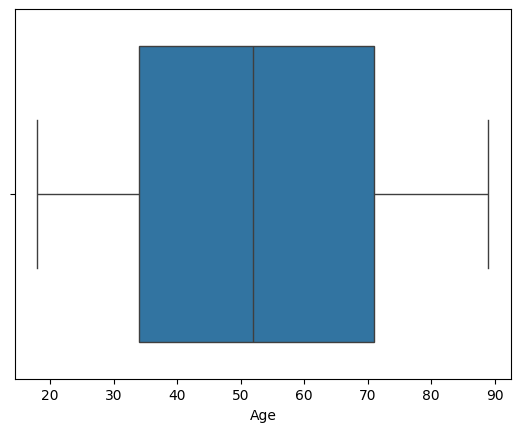

In [7]:
sns.boxplot(x=df['Age'])
plt.show()

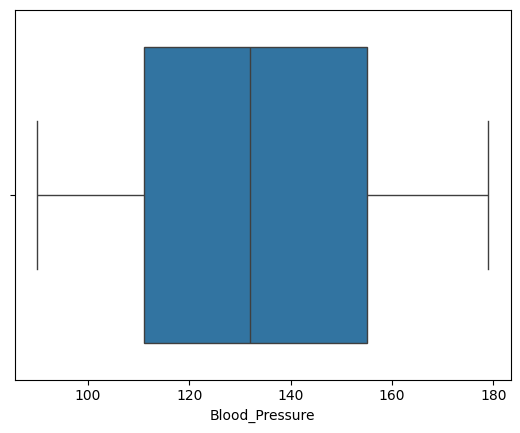

In [8]:
sns.boxplot(x=df['Blood_Pressure'])
plt.show()

In [9]:
age_95th_percentile = df['Age'].quantile(0.95)
df['Age'] = df['Age'].clip(upper=age_95th_percentile)

In [10]:
age_95th_percentile

85.04999999999995

In [11]:
blood_pressure_95th_percentile = df['Blood_Pressure'].quantile(0.95)
df['Blood_Pressure'] = df['Blood_Pressure'].clip(upper=blood_pressure_95th_percentile)

In [12]:
blood_pressure_95th_percentile

176.0

In [13]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)

In [14]:
scaler = MinMaxScaler()
df[['Age', 'Blood_Pressure']] = scaler.fit_transform(df[['Age', 'Blood_Pressure']])

In [15]:
scaler

MinMaxScaler()

In [16]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Blood_Pressure,30
Cholesterol,20
Diabetes,0
Heart_Disease,0


In [17]:
df.dtypes

,0
Patient_ID,int64
Age,float64
Gender,bool
Blood_Pressure,float64
Cholesterol,float64
Diabetes,object
Heart_Disease,object


In [18]:
df.duplicated().sum()

0

In [19]:
df.to_csv('cleaned_healthcare_data.csv', index=False)
df

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diabetes,Heart_Disease
0,1,0.760626,True,0.058140,122.0,No,No
1,2,0.208799,True,0.453488,191.0,No,No
2,3,1.000000,False,0.127907,214.0,No,No
3,4,0.894855,False,0.604651,203.0,No,No
4,5,0.298285,True,0.813953,217.0,No,No
...,...,...,...,...,...,...,...
495,496,0.238628,False,0.697674,297.0,No,Yes
496,497,1.000000,True,0.767442,146.0,Yes,No
497,498,0.656227,True,0.058140,177.0,No,Yes
498,499,0.044743,True,0.093023,223.0,No,No
